## EXPLORATORY DATA ANALYSIS OF THE SIGN LANGUAGE

#### This is the initial part of the project, lets make a deep dive into the data that we will work with to create the Machine Learning models.

#### It is supposed to contain images on grayscale representing 36 different signs of the sign language from the numbers (0-9) till the alphabet (a-z)

In [13]:
import os
import csv
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Setting the path of the training dataset (that was already provided to you)

running_local = True if os.getenv('JUPYTERHUB_USER') is None else False
DATASET_PATH = "."

# Set the location of the dataset
if running_local:
    # If running on your local machine, the sign_lang_train folder's path should be specified here
    local_path = os.path.join('..', '..', 'sign_lang_train')
    if os.path.exists(local_path):
        DATASET_PATH = local_path
else:
    # If running on the Jupyter hub, this data folder is already available
    # You DO NOT need to upload the data!
    DATASET_PATH = "/data/mlproject22/sign_lang_train"

In [5]:
### LETS READ THE CSV FILE AND THE .JPG FILES WITH THE CLASS BUILT IN SRC ###
from datasets import SignLangDataset
csv_filename = "labels.csv"  # This is your file inside sign_lang_train

# Create dataset
dataset = SignLangDataset(csv_file=csv_filename, root_dir=DATASET_PATH)

In [6]:
### DID WE READ IT CORRECTLY??? ###
dataset.__len__()

9680

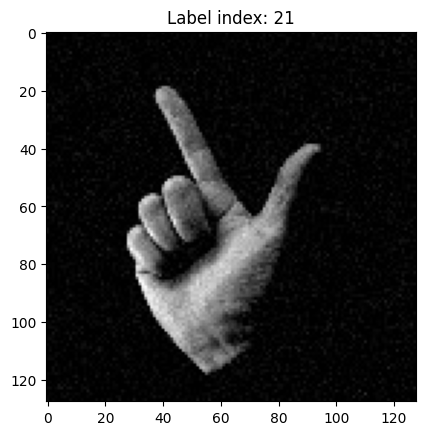

In [7]:
### LETS PRINT ONE SAMPLE FROM THE DATA SET TO SEE IF IT WAS CORRECTLY UPLOADED ###
### LETS PRINT THE FIRST IMAGE OF THE DATASET ACTUALLY, WITH ITS LABEL ###
sample = dataset[0]
image = sample['image'][0]  # Remove channel dim for display
label = sample['label']

plt.imshow(image, cmap='gray')
plt.title(f"Label index: {label}")
plt.show()


--- 1. Class Distribution ---
--- Class Distribution (Ordered) ---
0: 560
1: 112
2: 112
3: 112
4: 560
5: 112
6: 560
7: 112
8: 168
9: 560
a: 112
b: 280
c: 560
d: 168
e: 112
f: 112
g: 560
h: 112
i: 280
j: 280
k: 168
l: 560
m: 112
n: 112
o: 112
p: 560
q: 112
r: 112
s: 280
t: 104
u: 560
v: 280
w: 112
x: 112
y: 280
z: 560


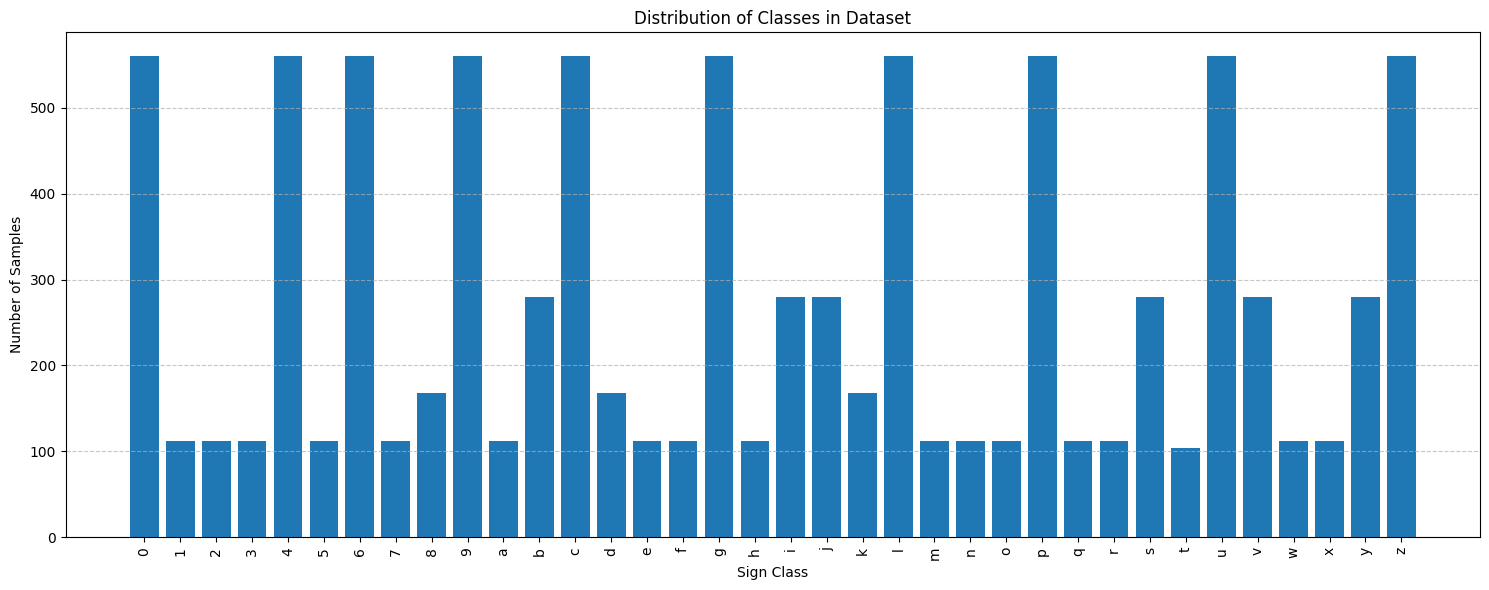

In [15]:
### Visualizing Data
import collections
# 1. Class Distribution
print("\n--- 1. Class Distribution ---")
labels = [dataset[i]['label'] for i in range(len(dataset))]
label_counts = collections.Counter(labels)
# Print nicely
print("--- Class Distribution (Ordered) ---")
for idx, name in enumerate(dataset.class_names):
    count = label_counts.get(idx, 0)
    print(f"{name}: {count}")

# Convert integer labels back to class names for readability
readable_label_counts = {dataset.class_names[k]: v for k, v in sorted(label_counts.items()) if k != -1} # Exclude dummy label

# Plotting Class Distribution
plt.figure(figsize=(15, 6))
plt.bar(readable_label_counts.keys(), readable_label_counts.values())
plt.xticks(rotation=90)
plt.title('Distribution of Classes in Dataset')
plt.xlabel('Sign Class')
plt.ylabel('Number of Samples')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


--- 2. Label Visualization ---


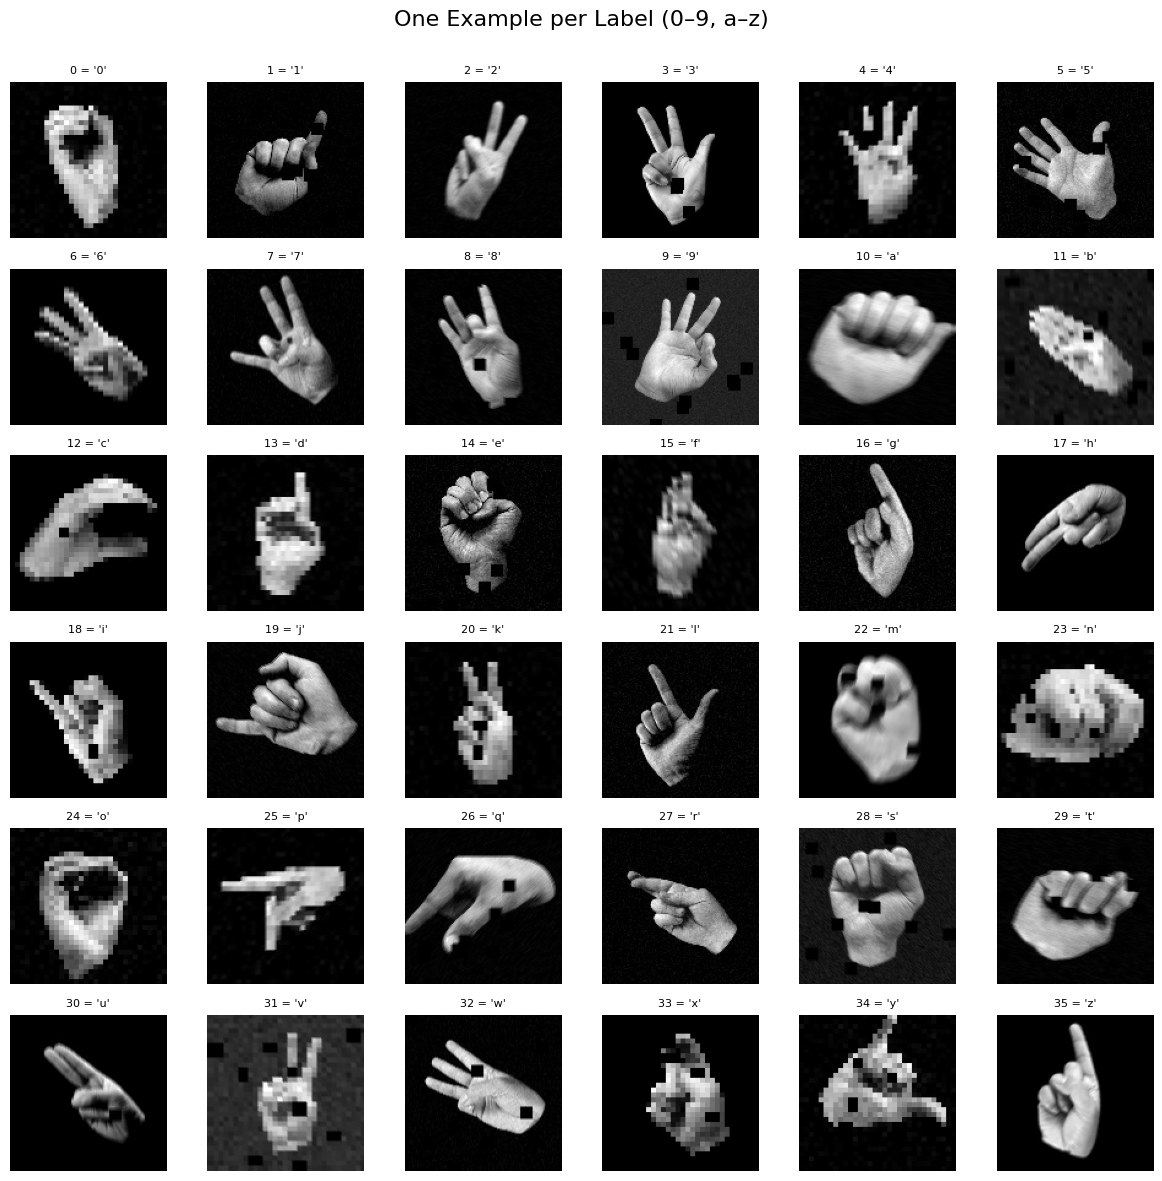

In [12]:
### LETS LOOK IF THE DATASET WAS CORRECTLY UPLOADED AND LETS PRINT ONE SAMPLE OF EACH LABEL ###
# Initialize a list of None for each label (0 to 35)
label_images = [None] * 36

for sample in dataset:
    label_idx = sample['label']
    if label_images[label_idx] is None:
        label_images[label_idx] = sample['image'][0]
    if all(img is not None for img in label_images):
        break

# Pad the rest with blank images
blank_image = np.ones_like(label_images[0]) * 255  # white image
while len(label_images) < 64:
    label_images.append(blank_image)

# Create 6x6 grid
fig, axes = plt.subplots(6, 6, figsize=(12, 12))
fig.suptitle("One Example per Label (0–9, a–z)", fontsize=16)

for idx, ax in enumerate(axes.flat):
    ax.imshow(label_images[idx], cmap='gray')
    if idx < 36:
        ax.set_title(f"{idx} = '{dataset.class_names[idx]}'", fontsize=8)
    ax.axis('off')

# 2. Class Distribution
print("\n--- 2. Label Visualization ---")

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [10]:
# 3. Image Dimensions (Check for consistency if not using transforms yet)
print("\n--- 3. Image Dimensions ---")
# This might take a moment for large datasets as it iterates through all images
# If your images are already normalized by your dataset or transform, they will all be the same.
# This is more useful to check the RAW image dimensions before any transforms.
image_dims = []
num_to_check = min(1000, len(dataset)) # Check first 1000 images or fewer
for i in range(num_to_check):
    # Directly access image from self.data to avoid re-reading if not needed
    # Or, if you need the actual loaded image dimensions, use dataset[i]
    image_path = os.path.join(dataset.root_dir, dataset.data[i][1])
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            image_dims.append(img.shape)
    except Exception as e:
        print(f"Could not read image {image_path} for dimensions: {e}")

unique_dims = collections.Counter(image_dims)
print(f"Unique image dimensions (first {num_to_check} samples): {unique_dims}")


--- 3. Image Dimensions ---
Unique image dimensions (first 1000 samples): Counter({(128, 128): 1000})



--- 4. Pixel Value Distribution (Optional) ---


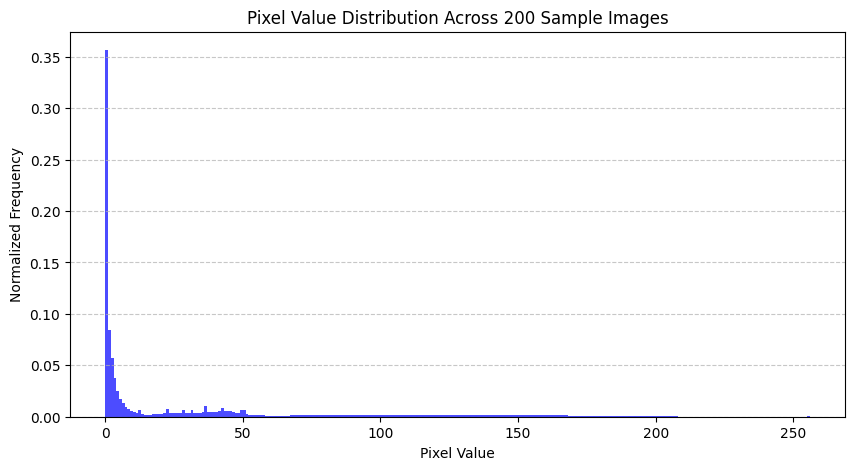

In [11]:
# 4. Pixel Value Distribution (Optional, can be memory intensive)
print("\n--- 4. Pixel Value Distribution (Optional) ---")
# Only sample a few images to avoid memory issues for very large datasets
pixel_values = []
num_images_for_hist = min(200, len(dataset))
for i in random.sample(range(len(dataset)), num_images_for_hist):
    sample = dataset[i]
    image = sample['image'].squeeze()
    if sample['label'] != -1: # Only include valid images
        pixel_values.extend(image.flatten())

if pixel_values:
    plt.figure(figsize=(10, 5))
    plt.hist(pixel_values, bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)
    plt.title(f'Pixel Value Distribution Across {num_images_for_hist} Sample Images')
    plt.xlabel('Pixel Value')
    plt.ylabel('Normalized Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No valid images found for pixel value distribution.")